## Visualizations

In [17]:
#to use the full width of the browser window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
from Poseidon.utils import *
from Poseidon.meteo import *
from IPython.display import HTML

### setup

In [19]:
#define in a dictionary the properties e.g
dic={'lon0':0., # lat/lon window
     'lon1':10.,
     'lat0':28.,
     'lat1':38.}

### extract meteo forcing

In [12]:
# specify the forecast times ft1,ft2
ft1 = 0
ft2 = 2 #that is 0,1 hours

In [13]:
# parse the ecmwf grib file.
m = ecmwf(mpath='/Users/brey/Downloads/20130301.00.tropical_cyclone.grib',ft1=ft1,ft2=ft2,**dic)

100%|██████████| 9/9 [00:05<00:00,  1.77it/s]


meteo done


## basemap

In [43]:
win={'lon0':-10, # lat/lon window of the figure
     'lon1':20.,
     'lat0':20.,
     'lat1':45.}

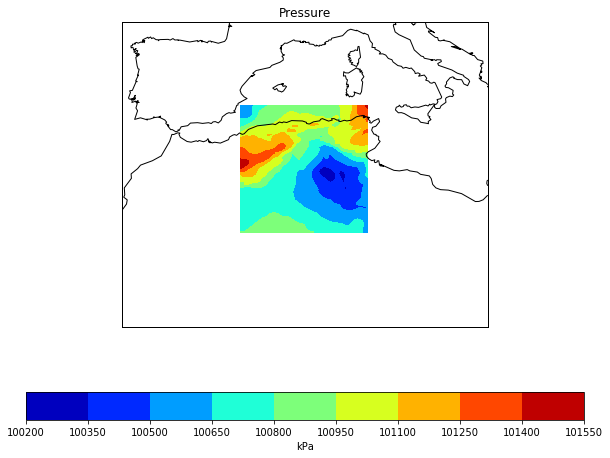

In [19]:
#
map(m.lons,m.lats,m.p[1,:,:],title='Pressure',label='kPa',ticks=False,**win)

## to PNG

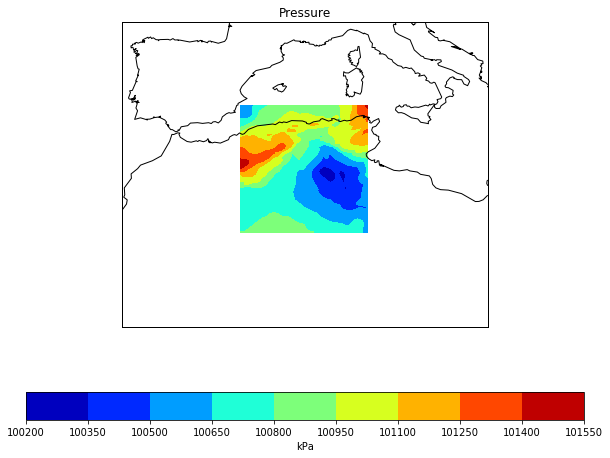

In [9]:
#
map(m.lons,m.lats,m.p[1,:,:],title='Pressure',label='kPa',png=True,path='/Users/brey/Downloads/fig.png',**win)

## to JSON

## load on map

## D3D results

In [2]:
data=DataFile('/home/critechproc/STORAGE/EUR/20100201.00/trim-test.nc')

In [3]:
grid=Grid.fromfile('/home/critechproc/STORAGE/EUR/20100201.00/test.grd')

In [4]:
deb=Dep.read('/home/critechproc/STORAGE/EUR/20100201.00/test.dep',grid.shape)

In [5]:
d=deb.val[:-1,:-1]
w=np.isnan(d)

In [6]:
x = grid.x.data

In [7]:
y = grid.y.data

In [8]:
h = data['S1'][:,:-1,:-1]

In [9]:
ha = np.transpose(h,axes=(0,2,1))

In [10]:
x.shape, ha.shape, w.shape

((521, 781), (13, 521, 781), (521, 781))

In [11]:
ww = np.broadcast_to(w == True, ha.shape)

In [12]:
z = np.ma.masked_where(ww==True,ha)

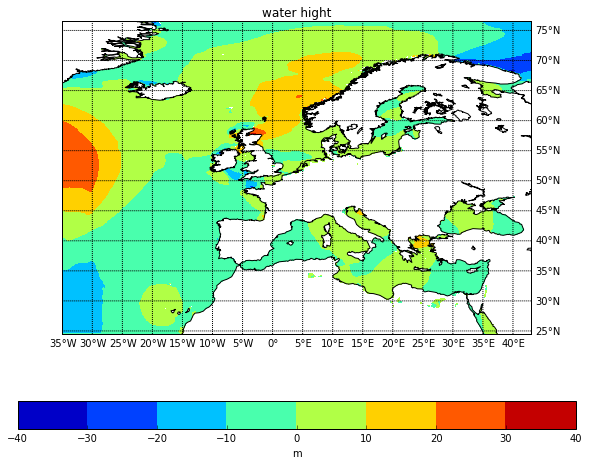

In [13]:
#see one frame
map(x,y,z[8,:,:],title='water hight',label='m',ticks=True)

In [14]:
#animate
a = anim(x,y,z[1:,:,:],title='Storm Surge',label='m',vrange=[z.min(),z.max()])

In [15]:
z.min(),z.max()

(-46.770935, 65.301849)

In [15]:
#show
a

In [60]:
#save it
a.save('/Users/brey/Downloads/anim.mp4', fps=10, extra_args=['-vcodec','libx264','-pix_fmt','yuv420p'])